In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../'

/Users/joe/Documents/boulot/git/homhots/HOTS


In [117]:
import numpy as np
import matplotlib.pyplot as plt

import os
from HOTS.ToolsMonitor import GenerateActivationMap, DisplayActivationMap
from HOTS.Event import Event, SimpleAlphabet
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer
from HOTS.ToolsMonitor import (
    DisplayImage,
    DisplaySurface3D,
    DisplaySurface2D,
    DisplayConvergence,
    DisplayPola
)
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.KmeansLagorce import KmeansLagorce

# Description du réseau HOTS

## Liste d'évènements

Evènements enregistrés par une camera event-based (expliquer le fonctionnement)

Fichier enregistré sous la forme $ev_i = (t,x,p)_i$

In [128]:
DataPath = "Data/alphabet_ExtractedStabilized.mat"
LabelPath = "Data/alphabet_label.pkl"
ImageSize = (32,32)
ListPolarities=[-1, 1]
nb_pola = 2

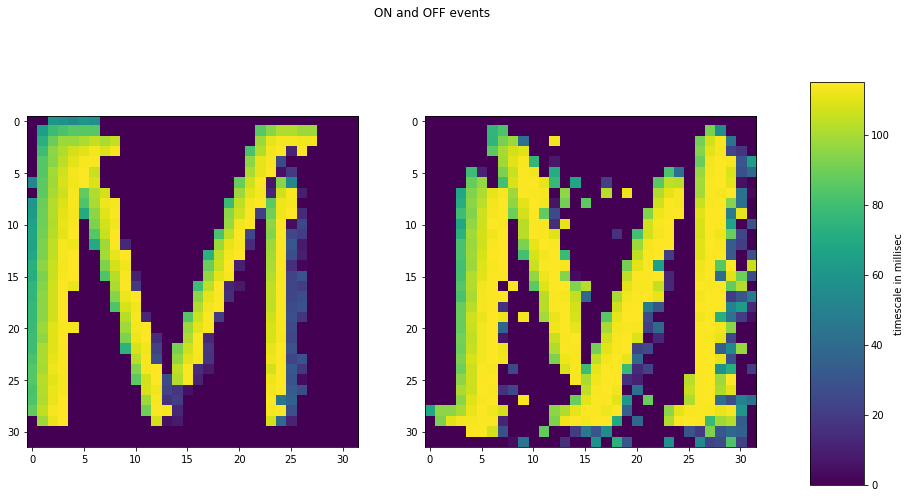

In [139]:
event0 = Event(ImageSize, ListPolarities)

event0.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=15)

DisplayPola(event0, ImageSize, nb_pola)

## Time Surface

Generation of SpatioTemporal Surface in ------ 0.61 s


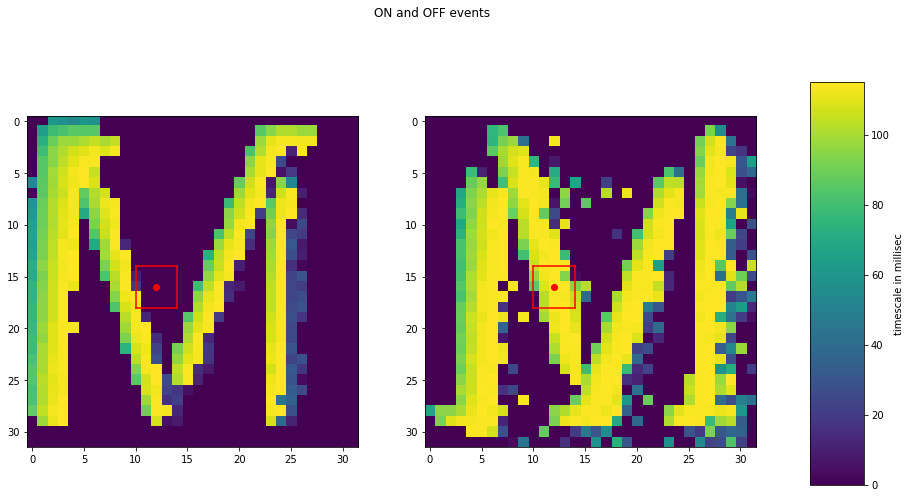

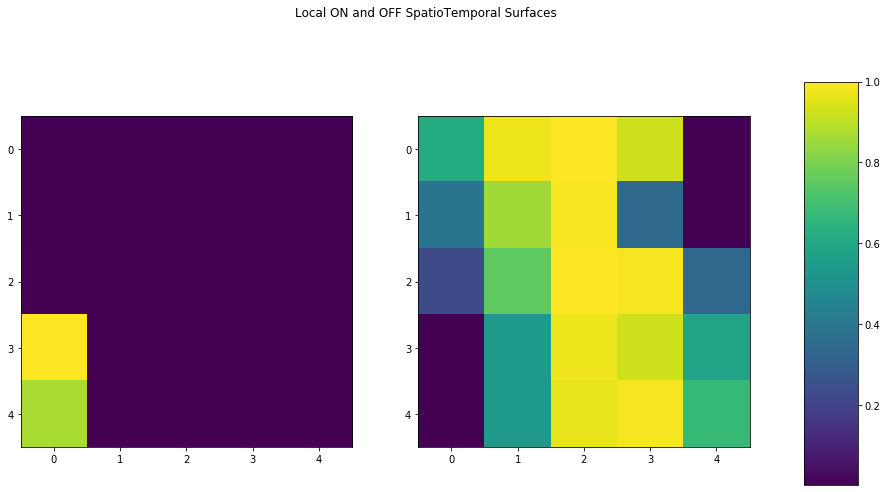

In [141]:
R = 2
tau = 0.02

SpTe = STS(tau, R, verbose=1, initial_time=0)
Surface = SpTe.create(event=event0, stop=None)

DisplayPola(event0, ImageSize, nb_pola, R, rect = True)

fig,axs = plt.subplots(1, 2, figsize=(15,8))
axs[0].imshow(np.exp(-SpTe.LocalTimeDiff[0, :, :]/tau))
br = axs[1].imshow(np.exp(-SpTe.LocalTimeDiff[1, :, :]/tau))
fig.suptitle('Local ON and OFF SpatioTemporal Surfaces')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(br, cax=cbar_ax)

## Echelle locale

### Lagorce

### Maro

## Ajout d'une règle d'homéostasie